In [23]:
#Imported modules

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import pickle

In [24]:
# %%
#Load dataset
anonymous_data = pd.read_csv('symtomps_disease.csv')


In [25]:
# %%
#Train && Test Phase
X = anonymous_data[['s1','s2','s3','s4']]
y = anonymous_data[['disease']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [26]:
# %%
#Performed OHE

OHE = OneHotEncoder()
OHE.fit_transform(X_train)
X_train_OHE = OHE.transform(X_train).toarray()

OHE_anonymous_data = pd.DataFrame(X_train_OHE, columns=OHE.get_feature_names(X_train.columns))

OHE_anonymous_data.head()

d:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,s1_bad_breath,s1_diff_pain_urinating,s1_ear_canal_redness,s1_fever,s1_listleness,s1_nausea,s1_refuse_eat_dryfood,s1_skin_infection,s1_vomiting,s1_weight_loss,...,s4_dehydration,s4_excessive_licking_genital_area,s4_gagging,s4_loose_teeth,s4_loss_of_appetite,s4_mouth_blood_discharge,s4_persistent_sores,s4_restleness,s4_stomatitis,s4_vomiting
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# %%
#Train the algorithm - Create the classifier, fit it on the training data and make predictions on the test set

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train_OHE, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy', max_depth=None, max_features=None, max_leaf_nodes=None,
min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, random_state=None, splitter='best')

DecisionTreeClassifier(criterion='entropy')

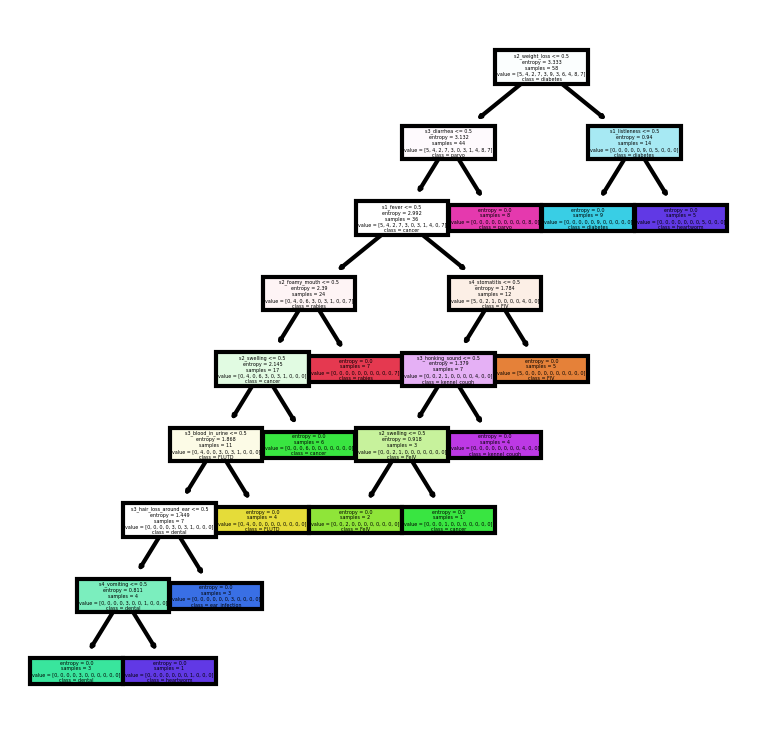

In [28]:
# %%
#Plot the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)

tree.plot_tree(clf, feature_names = OHE_anonymous_data.columns, class_names=np.unique(y).astype('str'), filled = True)

plt.show()

In [29]:
# %%
#Evaluate the predictive performance
X_test_ohe = OHE.transform(X_test)
y_preds = clf.predict(X_test_ohe)

print('Accuracy: ', accuracy_score(y_test, y_preds))
print(classification_report(y_test,y_preds))


Accuracy:  1.0
              precision    recall  f1-score   support

         FIV       1.00      1.00      1.00         2
        FeIV       1.00      1.00      1.00         2
      cancer       1.00      1.00      1.00         4
      dental       1.00      1.00      1.00         2
    diabetes       1.00      1.00      1.00         4
   heartworm       1.00      1.00      1.00         5
kennel_cough       1.00      1.00      1.00         2
       parvo       1.00      1.00      1.00         2
      rabies       1.00      1.00      1.00         2

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

